# Galaxies: An interactive graduate course

## Chapter 1: A brief history of galaxies

#### (c) Benedikt Diemer, University of Maryland

This notebook is purely an introduction to the code for this class and is, unlike the following notebooks, not directly related to the lecture notes for Chapter 1.

### Setting up your environment

We'll keep our notebooks as simple as possible by shifting default settings and routines that we need frequently into python files. I recommend always including the following lines at the beginning of each of your notebooks:

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from routines import common as cmn

# Plotting settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Automatically reload code imported from changed python files
%reload_ext autoreload
%autoreload 2

This loads a global module called ``cmn`` which contains a few useful fields, such as a path to your data directory and a default cosmology object. If one of the commands above fails, it is likely because you do not have all the necessary python packages installed. Besides the usual numpy/scipy libraries, you need:

* [astropy](https://www.astropy.org/index.html)
* [colossus](https://bdiemer.bitbucket.io/colossus/)
* [ezgal](http://www.baryons.org/ezgal/) (for notebook 7 only)

Astropy and Colossus can easily be installed with pip (``pip install astropy`` and so on). See the chapter [Installation](https://bdiemer.bitbucket.io/colossus/installation.html) in the Colossus docs if there are issues. The EzGal module can, in principle, be installed with ``pip install ezgal``, but this option did not work on my laptop. Instead, you can clone the [repository](https://github.com/cmancone/easyGalaxy) and add its path to your ``PYTHONPATH`` environment variable.

### Making plots

Let's make a simple plot to test our plot settings. Most importantly, make sure that latex text output works:

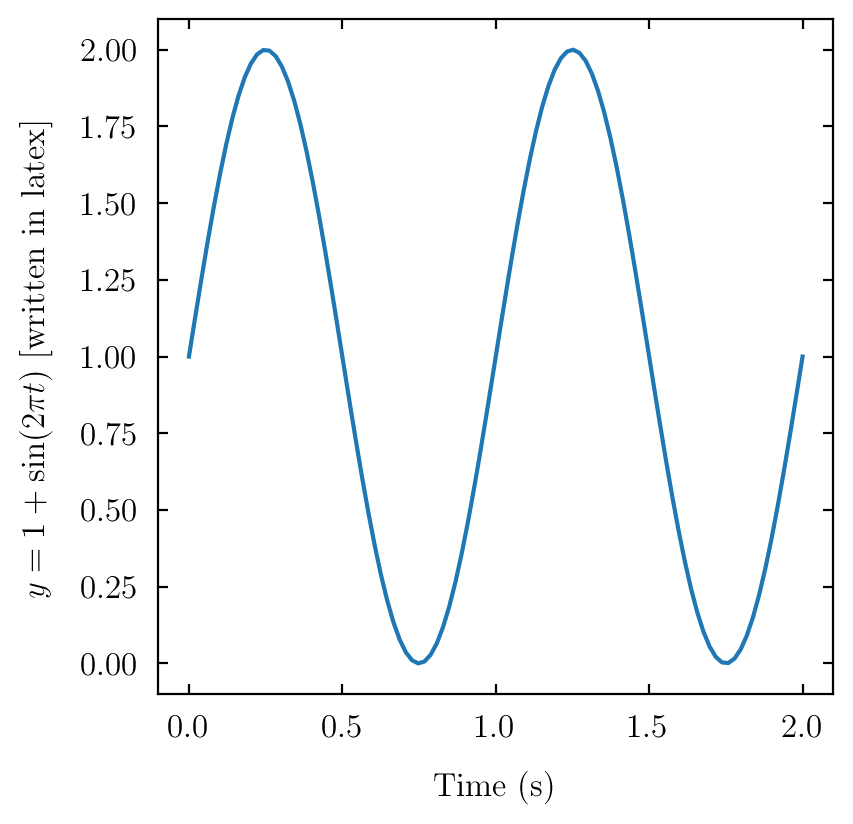

In [2]:
t = np.linspace(0.0, 2.0, 100)
y = 1 + np.sin(2 * np.pi * t)

plt.figure()
plt.xlabel(r'$\mathrm{Time\ (s)}$')
plt.ylabel(r'$y = 1 + \sin(2 \pi t)\ [\mathrm{written\ in\ latex}]$')
plt.plot(t, y)
plt.show()

### Changing your data path and getting data files

The one and only thing you need to change in the code is the data directory. This directory will contain all the data files we will work on, as well as any temporary files we create. The data files are way too large to be part of the Github repository. 
* Go to [routines/common.py](routines/common.py) and change the ``data_dir`` variable to a path on your machine.
* Update the contents of your data folder from my [web directory](https://erebos.astro.umd.edu/teaching/astr620/data/). You can download them file-by-file, or as a [zip file](https://erebos.astro.umd.edu/teaching/astr620/data.zip). For a command-line approach, you can navigate to your data directory and execute the command

  ``wget --recursive --no-parent -R "index.html*" -nH --cut-dirs 2 http://erebos.astro.umd.edu/teaching/astr620/data/``

Your data directory should now contain a file called ``fits_example.fits``, as well as a number of other directories. Let's check:

In [3]:
import os

fn_fits = cmn.data_dir + '/fits_example.fits'

if os.path.exists(fn_fits):
    print('Found the example FITS file, nice!')
else:
    raise Exception('Could not find file %s.' % (fn_fits))

Found the example FITS file, nice!


### Using astropy to load FITS files

Astropy is a general python library for astrophysics, but we will mostly use to deal with the FITS file format. The example FITS file is an image of the horsehead nebula (taken from the [Astropy Documentation](https://docs.astropy.org/en/stable/index_user_docs.html)).

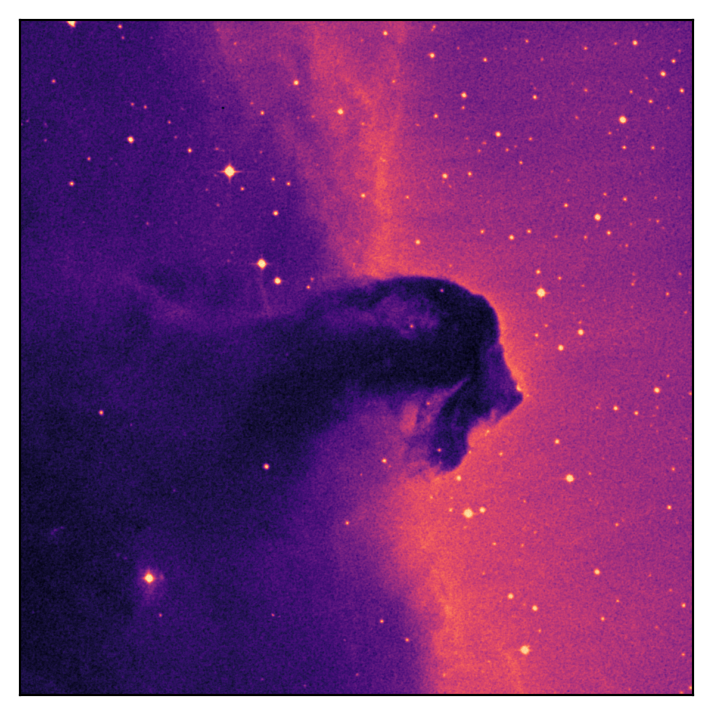

In [4]:
from astropy.io import fits

im = fits.getdata(fn_fits)

plt.figure()
ax = plt.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.imshow(im, cmap = 'magma')
plt.show()

### Using Colossus for cosmological calculations

Throughout the course, we will need cosmological calculations such as distances whose details aren't really the subject of the course, but many of them are non-trivial to code up correctly. We thus use the Colossus code throughout. The following examples are taken from the larger Colossus tutorial notebooks, which you can find in the Colossus [repository](https://bitbucket.org/bdiemer/colossus/src/master/tutorials/) or [documentation](https://bdiemer.bitbucket.io/colossus/tutorials.html).

#### Setting, changing, and adjusting cosmologies

Let's begin by importing the Colossus cosmology module:

In [5]:
from colossus.cosmology import cosmology

Let's set a cosmology, e.g. the most recent Planck cosmology. This function returns a cosmology object:

In [6]:
cosmo = cosmology.setCosmology('planck18')

Colossus comes with more than 20 hard-coded cosmologies:

In [7]:
for k in cosmology.cosmologies:
    print(k)

planck18-only
planck18
planck15-only
planck15
planck13-only
planck13
WMAP9-only
WMAP9-ML
WMAP9
WMAP7-only
WMAP7-ML
WMAP7
WMAP5-only
WMAP5-ML
WMAP5
WMAP3-ML
WMAP3
WMAP1-ML
WMAP1
illustris
bolshoi
multidark-planck
millennium
EdS
powerlaw


If we want to retrieve details about a given cosmology, we can just print the cosmology object:

In [8]:
print(cosmo)

Cosmology "planck18" 
    flat = True, Om0 = 0.3111, Ode0 = 0.6888, Ob0 = 0.0490, H0 = 67.66, sigma8 = 0.8102, ns = 0.9665
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


In Colossus, the cosmology is set globally. This means that we can obtain the current cosmology object from anywhere in the code. In our ``common.py`` code, we have already set the Planck 2018 cosmology, so this function will work in your notebooks even if you haven't set the cosmology explicitly:

In [9]:
cosmo = cosmology.getCurrent()
print(cosmo.name)

planck18


Alternatively, we can just get the cosmology object we have already set up:

In [10]:
cosmo = cmn.cosmo
print(cosmo.name)

planck18


Cosmologies are objects, meaning that we can keep multiple cosmologies around. This can be useful when switching back and forth between different cosmologies, for example:

In [11]:
cosmo2 = cosmology.setCosmology('WMAP9')
cosmology.setCurrent(cosmo2)
print(cosmology.getCurrent().name)
cosmology.setCurrent(cosmo)
print(cosmology.getCurrent().name)

WMAP9
planck18


Of course, you can also set a user-defined cosmology. You should NOT just manipulate the parameters in the ``cosmo`` object! Instead, you can create a new cosmology. In this case, arguments to the constructor of the Cosmology object are passed as a dictionary. Note that there are many more possible arguments than shown here, as described in the documentation.

In [12]:
my_cosmo = {'flat': True, 'H0': 72.0, 'Om0': 0.25, 'Ob0': 0.043, 'sigma8': 0.8, 'ns': 0.97}
cosmo = cosmology.setCosmology('my_cosmo', **my_cosmo)
print(cosmo)

Cosmology "my_cosmo" 
    flat = True, Om0 = 0.2500, Ode0 = 0.7499, Ob0 = 0.0430, H0 = 72.00, sigma8 = 0.8000, ns = 0.9700
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


By default, relativistic species (neutrinos and photons) are included, meaning that they contribute to the energy density of the universe and are subtracted from the remaining components. Thus, when setting the flat cosmology above with $\Omega_{\rm m,0}=0.25$ and `relspecies=True`, the density of dark energy is not 0.75 but rather 0.75 minus the density of relativistic species. In practice, the relativistic contribution is small except at very high redshifts and makes a negligible contribution to most calculations.

All the default parameter sets above represent flat $\Lambda CDM$ cosmologies, i.e. model dark energy as a cosmological constant and contain no curvature. To add curvature, the default for flatness must be overwritten, and the dark energy content of the universe must be set explicitly (for flat cosmologies, it is computed from the matter and relativistic contributions). We can either create an updated parameter dictionary and pass it as params, or we can additionally use keyword arguments that overwrite the content of params:

In [13]:
cosmo = cosmology.setCosmology('planck_curv', params = cosmology.cosmologies['planck18'], flat = False, Ode0 = 0.75)
print(cosmo.Ok0)

-0.06119138647952183


#### Standard calculations: Densities, distances, times

Let's perform some simple calculations such as cosmological densities, distances, and times. As discussed above, the planck18 cosmology is set as a default in our global script, so we can simply access it:

In [14]:
cosmo = cmn.cosmo
print(cosmo.name)

planck18


We can now evaluate standard cosmological quantities. For example, let's print the age of the universe today. The cosmology functions always take redshift rather than scale factor as an argument:

In [15]:
cosmo.age(0.0)

array(13.78620642)

Note that the returned age is in Gyr. The colossus cosmology functions adhere to the following unit system:

* Cosmological scales: comoving ${\rm Mpc} / h$
* Halo scales: physical ${\rm kpc} / h$
* Mass: $M_\odot / h$
* Wavenumber: comoving $h / {\rm Mpc}$
* Time: ${\rm Gyr}$
* Density: physical $M_\odot h^2 / {\rm kpc}^3$

Virtually all Colossus functions accept numpy arrays as input and return arrays of the same dimensions:

In [16]:
import numpy as np
z = np.array([0.0, 1.0, 2.0, 3.0])
cosmo.angularDiameterDistance(z)

array([-1.76263959e-15,  1.14871120e+03,  1.19712269e+03,  1.10009255e+03])

The Colossus cosmology module works to pretty extreme redshifts, namely between $z = -0.995$ and $200$ (though some functions may have stricter limits, for example $z>=0$). For example, let's plot the relative density contribution of the various components in the Planck cosmology:

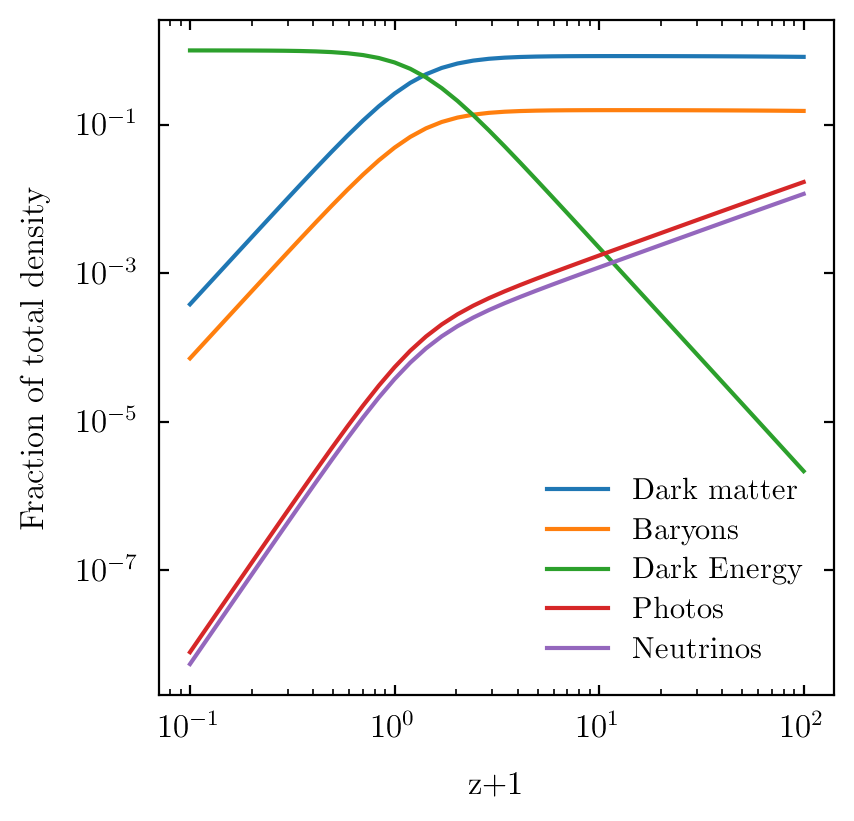

In [17]:
zp1 = 10**np.linspace(-1.0, 2.0, 40)
z = zp1 - 1.0

O_b = cosmo.Ob(z)
O_dm = cosmo.Om(z) - O_b
O_de = cosmo.Ode(z)
O_gamma = cosmo.Ogamma(z)
O_nu = cosmo.Onu(z)

plt.figure()
plt.loglog()
plt.xlabel('z+1')
plt.ylabel('Fraction of total density')
plt.plot(zp1, O_dm, '-', label = 'Dark matter')
plt.plot(zp1, O_b, '-', label = 'Baryons')
plt.plot(zp1, O_de, '-', label = 'Dark Energy')
plt.plot(zp1, O_gamma, '-', label = 'Photos')
plt.plot(zp1, O_nu, '-', label = 'Neutrinos')
plt.legend(loc = 4);

There is more to the functions mentioned above: they can also give us their own inverse, e.g. $z(t)$ instead of $t(z)$:

In [18]:
z = np.array([0.0, 1.0, 2.0, 3.0])
t = cosmo.age(z)
z2 = cosmo.age(t, inverse = True)
print(z2)

[-4.41276515e-05  9.99787190e-01  1.99991520e+00  3.00002259e+00]


The slight errors in the recovered redshifts give a hint as to how colossus works internally: the majority of functions rely on interpolation for performance. The interpolating splines can be inverted numerically. If, for some reason, you really need the exact calculation, you can set `interpolation = False` in the constructor, or at a later time. Once again using interpolating splines, we can also evaluate the derivatives of many functions, e.g. $dt/dz$ or $d^2t/dz^2$:

In [19]:
cosmo.age(z, derivative = 1)

array([-14.45267824,  -4.05174963,  -1.59720974,  -0.79551907])

While the documentation quotes a particular accuracy for each function, the accuracy of the derivatives and inverses is not guaranteed. There are many more functions related to densities, distances, and times. Please consult the [documentation of the cosmology module](https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html) for an exhaustive list.

#### Cosmological distances

One type of cosmological calculation that appears often in the study of galaxies are cosmological distances. Let's plot the different distances as a function of redshift (see lecture notes for more details).

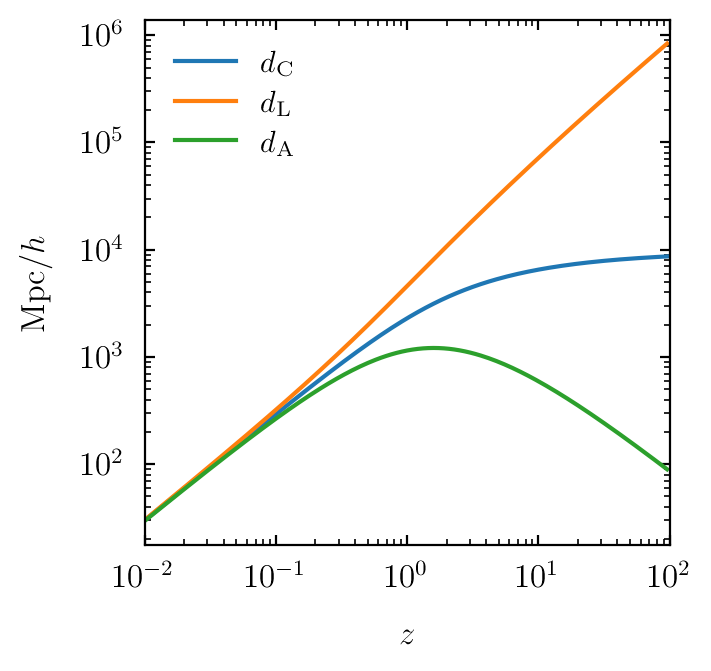

In [20]:
z_min = -2.0
z_max = 2.0
z = 10**np.arange(z_min, z_max, 0.02)

dC = cosmo.comovingDistance(0.0, z)
dL = cosmo.luminosityDistance(z)
dA = cosmo.angularDiameterDistance(z)

plt.figure(figsize = (3.5, 3.5))
plt.loglog()
plt.xlabel(r'$z$')
plt.ylabel(r'${\rm Mpc}/h$')
plt.xlim(10**z_min, 10**z_max)
plt.plot(z, dC, label = r'$d_{\rm C}$')
plt.plot(z, dL, label = r'$d_{\rm L}$')
plt.plot(z, dA, label = r'$d_{\rm A}$')
plt.legend()
plt.show()

We see that the angular diameter distance behaves quite differently from the luminosity distance. As a result, the translation from arcseconds we see in the sky to physical kpc is also non-trivial:

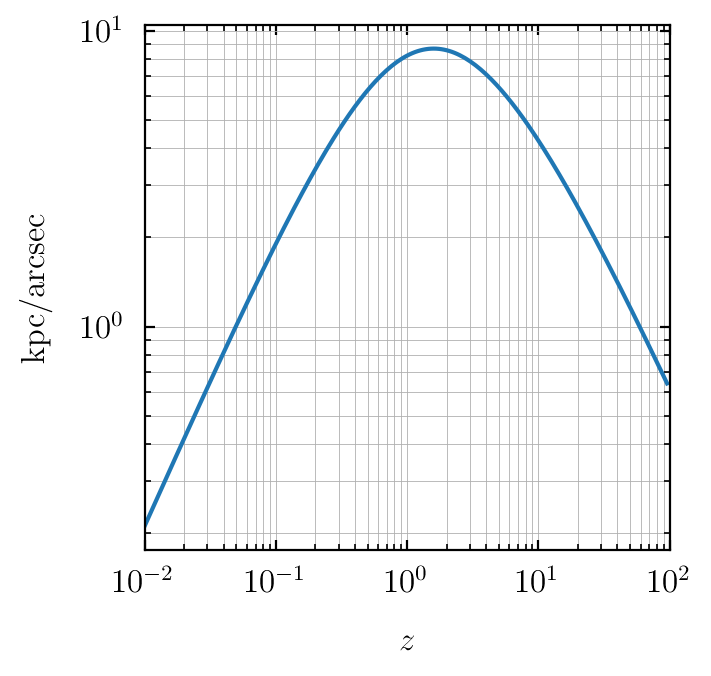

In [21]:
kpc = dA * (2 * np.pi / 360.0) / 3600.0 * 1000.0 / cosmo.h

plt.figure(figsize = (3.5, 3.5))
plt.loglog()
plt.xlabel(r'$z$')
plt.ylabel(r'${\rm kpc}/{\rm arcsec}$')
plt.grid(which = 'both', lw = 0.3)
plt.xlim(10**z_min, 10**z_max)
plt.plot(z, kpc)
plt.show()